In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()
matplotlib.rcParams["figure.figsize"] = (12, 8)


# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
df = pd.read_csv("../data/people_data_clustering.csv", index_col=0)
print("Размеры", df.shape)
df.head()


Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [3]:
# Посмотрим какие типы данных хранит каждый столбец
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6000 non-null   int64  
 1   was_married  6000 non-null   int64  
 2   childrens    6000 non-null   float64
 3   salary       6000 non-null   float64
 4   sex          6000 non-null   int64  
 5   age          6000 non-null   float64
 6   profession   6000 non-null   object 
 7   home_cost    6000 non-null   float64
 8   drive_info   3230 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 468.8+ KB


In [4]:
# А также колличество уникальных значений
df.nunique()


id             5500
was_married       2
childrens         7
salary         5143
sex               2
age              20
profession        9
home_cost      5500
drive_info        2
dtype: int64

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'was_married'}>,
        <AxesSubplot:title={'center':'childrens'}>],
       [<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'home_cost'}>,
        <AxesSubplot:title={'center':'drive_info'}>, <AxesSubplot:>]],
      dtype=object)

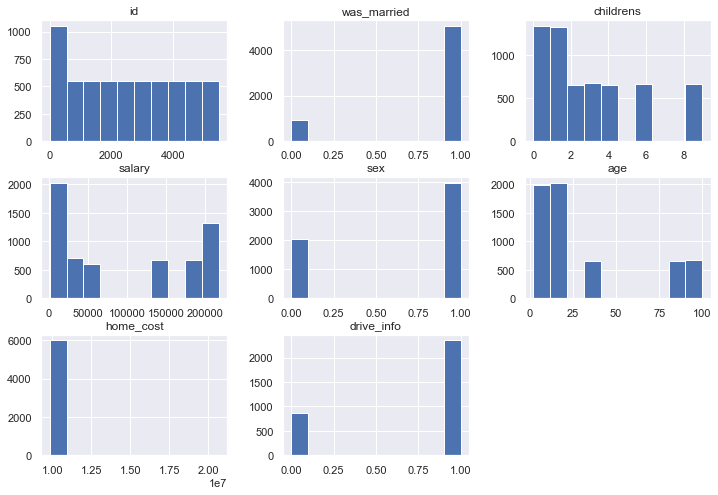

In [5]:
# Проверяем распределение признаков
df.hist()
# sns.histplot(df.home_cost, kde=True)


* Если удалить выбросы у стоимости дома, то это признак будет нормально распределен

Уже из данного описания датасета можно было заключить какие признакие представляют какие типы данных:
* Численные: salary, home_cost, age, childrens
* Категориальные: sex, profession
* Бинарные: was_married, drive_info 
* Бессмысленный: id

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [6]:
# в nunique заметили, что существует 5500 значений для id, проверим на дубликаты
df[df.duplicated()]


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
5500,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
5501,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
5502,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
5503,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
5504,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN
...,...,...,...,...,...,...,...,...,...
5995,495,1,0.0,37023.38,1,3.0,Executive,1.007038e+07,1.0
5996,496,1,3.0,999.66,0,20.0,Homemaker,1.009348e+07,1.0
5997,497,1,0.0,2042.76,0,17.0,Healthcare,1.016696e+07,0.0
5998,498,0,1.0,186560.45,0,10.0,Lawyer,1.025544e+07,NaN


* Нашел 500 дублей

In [7]:
# Удаление дублей
df = df.drop_duplicates()
df.shape


(5500, 9)

In [8]:
# в df.nunique заметил, что существует 3230 значений для drive_info, есть пропуски
df.drive_info.value_counts(dropna=False)


NaN    2524
1.0    2168
0.0     808
Name: drive_info, dtype: int64

In [9]:
# Проверим и другие столбцы на пропуски
df.isna().any()


id             False
was_married    False
childrens      False
salary         False
sex            False
age            False
profession     False
home_cost      False
drive_info      True
dtype: bool

* Нашел 2770 пропусков в drive_info, почти половина. 

In [10]:
# Попробую заполнить пропуски самым встречающимся значением и добавлю метку о пропуске.

df["drive_info_na_indicator"] = df.drive_info.isnull().astype(int)
df.drive_info = df.drive_info.fillna(value=df.drive_info.mode()[0])
df


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info,drive_info_na_indicator
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,1.0,1
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0,0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,1.0,1
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,1.0,1
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,1.0,1
...,...,...,...,...,...,...,...,...,...,...
5495,5495,1,1.0,12676.77,1,9.0,Marketing,1.027045e+07,0.0,0
5496,5496,1,6.0,215570.69,1,13.0,Entertainment,1.032767e+07,1.0,0
5497,5497,1,0.0,34734.29,1,3.0,Executive,1.010075e+07,1.0,1
5498,5498,1,1.0,12667.06,1,9.0,Marketing,1.011321e+07,1.0,0


* Удалю бессмысленный признак id

In [11]:
df = df.drop(columns=["id"])


### Посмотрим подробнее на распределение признака home_cost

<AxesSubplot:>

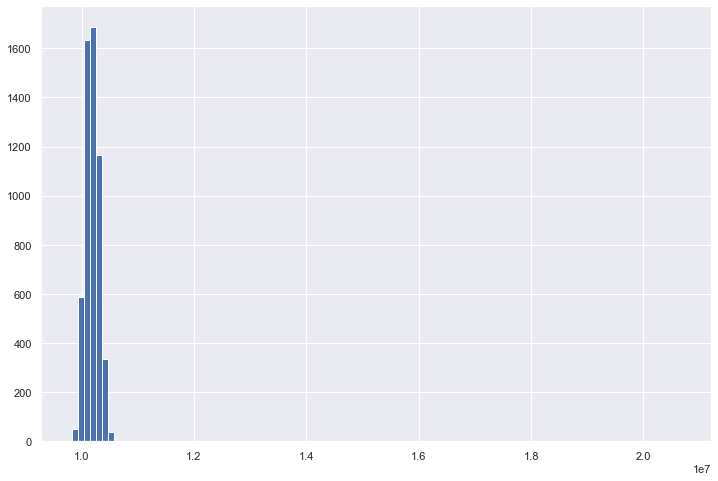

In [12]:
df.home_cost.hist(bins=100)


<AxesSubplot:>

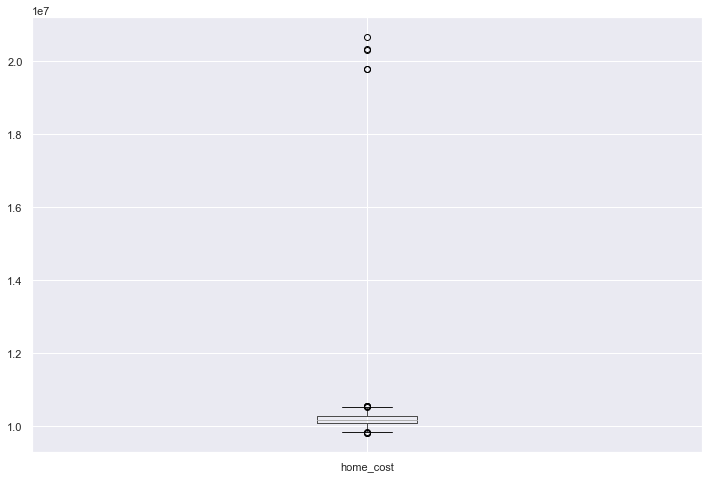

In [13]:
df.boxplot(column=["home_cost"])


In [14]:
df[df.home_cost > 1.2e7]


,was_married,childrens,salary,sex,age,profession,home_cost,drive_info,drive_info_na_indicator
1140,1,4.0,44341.55,1,82.0,Engineer,2.032128e+07,1.0,0
1779,1,3.0,1000.14,0,20.0,Homemaker,2.031197e+07,1.0,0
3307,1,0.0,35467.73,1,3.0,Executive,1.979488e+07,1.0,0
3380,1,0.0,35910.63,1,3.0,Executive,1.979532e+07,0.0,0
4727,1,1.0,12628.46,1,9.0,Marketing,2.065792e+07,1.0,0


In [15]:
# Удалил выбросы
df = df.drop(df[df.home_cost > 1.2e7].index)
df.shape


(5495, 9)

* В статистическом понимании эти данные являются выбросами. Но по моему субъективному мнению, отличие стоимости дома в 2 раза не является выбросом, но мы не знаем, что за единицы измерения и тд и тп.

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [16]:
# строю матрицу корреляций
corr_matrix = df.corr()
corr_matrix


,was_married,childrens,salary,sex,age,home_cost,drive_info,drive_info_na_indicator
was_married,1.000000,0.242697,-0.500241,0.337603,0.200620,-0.342264,0.001526,-0.007926
childrens,0.242697,1.000000,0.393778,0.385956,0.742385,0.284329,0.014324,0.009037
salary,-0.500241,0.393778,1.000000,0.245119,0.075932,0.709748,0.007787,0.018490
sex,0.337603,0.385956,0.245119,1.000000,0.340363,0.181085,0.016421,0.026503
age,0.200620,0.742385,0.075932,0.340363,1.000000,0.055397,0.006407,-0.010547
home_cost,-0.342264,0.284329,0.709748,0.181085,0.055397,1.000000,0.011668,0.024481
drive_info,0.001526,0.014324,0.007787,0.016421,0.006407,0.011668,1.000000,0.382416
drive_info_na_indicator,-0.007926,0.009037,0.018490,0.026503,-0.010547,0.024481,0.382416,1.000000


<AxesSubplot:>

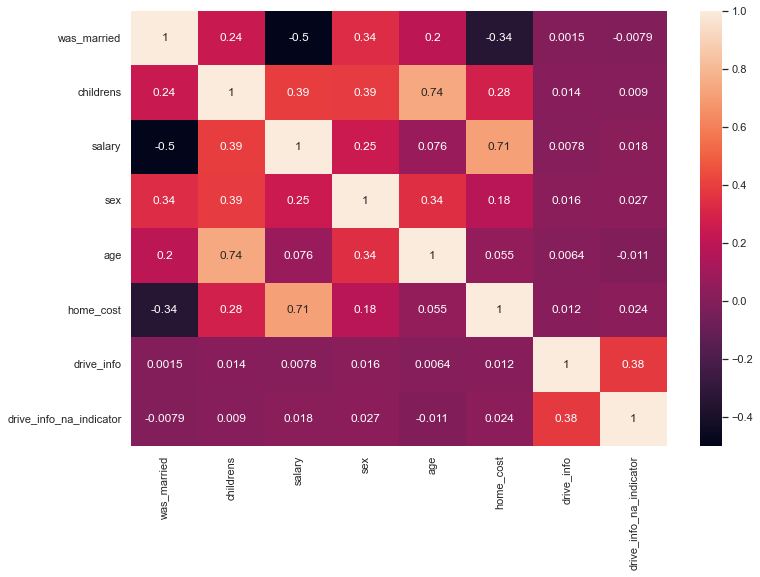

In [17]:
# визуализация матрицы корреляций
sns.heatmap(corr_matrix, annot=True)


* Самая большая корреляция между колонками age-childrens, на втором месте salary-home_cost.
  
Корреляции заработной платы и стоимости дома мне кажется более логичной, чем колличество детей и возраста.

Хотя, эта корреляция может говорить о том, что раньше было принято иметь большие семьи(большой возраст, от 80), для меньших возрастов, чем старше становитсья семья, тем больше возможности завести еше одного ребенка. 

<AxesSubplot:xlabel='age', ylabel='childrens'>

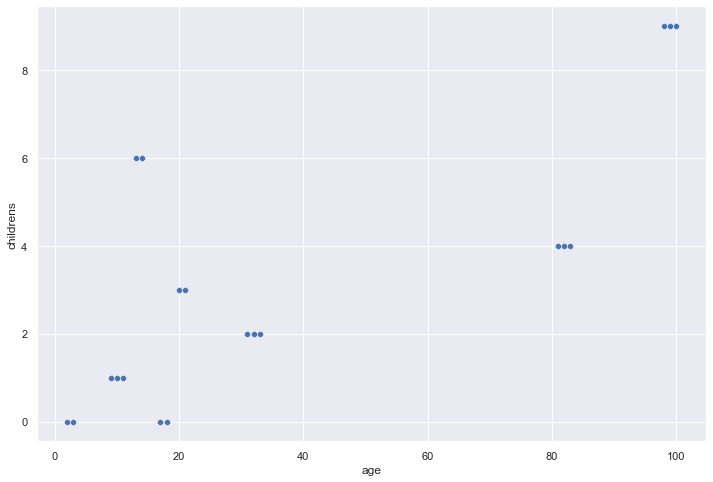

In [18]:
# график зависимости между возрастом и колличеством детей
sns.scatterplot(x="age", y="childrens", data=df)


<AxesSubplot:xlabel='salary', ylabel='home_cost'>

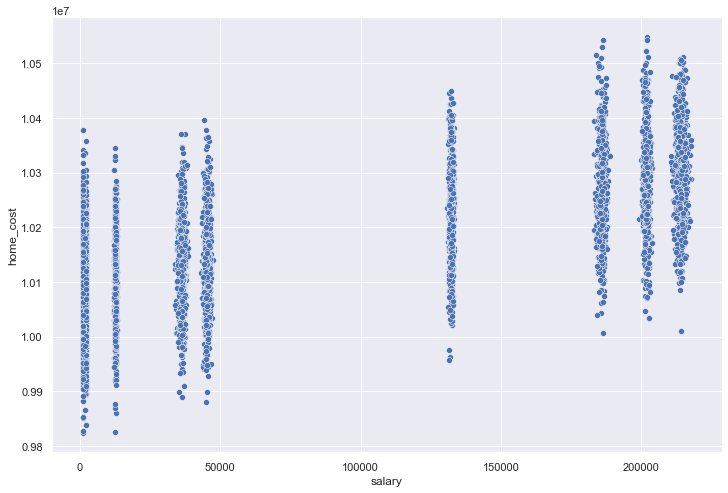

In [19]:
# график зависимости между зарплатой и стоимостью дома
sns.scatterplot(x="salary", y="home_cost", data=df)


# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

* Так как в численных признаках нет пропусков RobustScaler отпадает.
* Нормальное распределение наблюдается только у home_cost, значит для большинства отпадает StandardScaler
* Поэтому выбор падает на MinMaxScaler

* Также преобразуем категориальные признаки

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

numeric_cols = [
    "childrens",
    "age",
    "salary",
    "home_cost",
]
categorial_cols = [
    # "sex",
    "profession",
]

normal_data = df.copy()
# normal_data = normal_data.drop(columns=["drive_info_na_indicator", "drive_info"])
 
# Зададим "трансформер" столбцов
transformer = make_column_transformer(
    (MinMaxScaler(), numeric_cols),
    (OneHotEncoder(), categorial_cols),
)

normal_data = transformer.fit_transform(normal_data)


# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

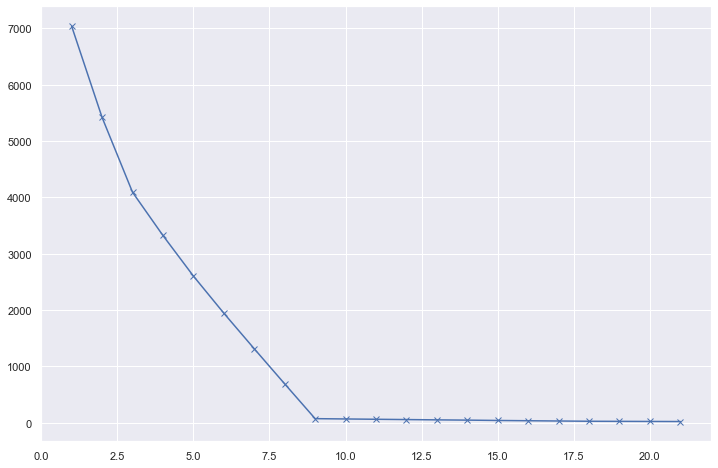

In [21]:
from sklearn.cluster import KMeans

sum_of_square = []
for n_clusters in range(1, 22):
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, max_iter=500)
    clusterer.fit(normal_data)
    sum_of_square.append(clusterer.inertia_)
plt.plot(range(1, 22), sum_of_square, "bx-")


* Оптимальное колличество кластеров - 9

In [22]:
# Сохраним номера кластеров
clusterer = KMeans(n_clusters=9, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(normal_data)


# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [23]:
from sklearn.manifold import TSNE

data_x_y = TSNE(
    n_components=2,
    random_state=22,
    learning_rate=150,
    perplexity=25,
    init="pca",
    n_jobs=-1,
).fit_transform(normal_data)


# Нарисовать полученные кластеры (10 баллов)

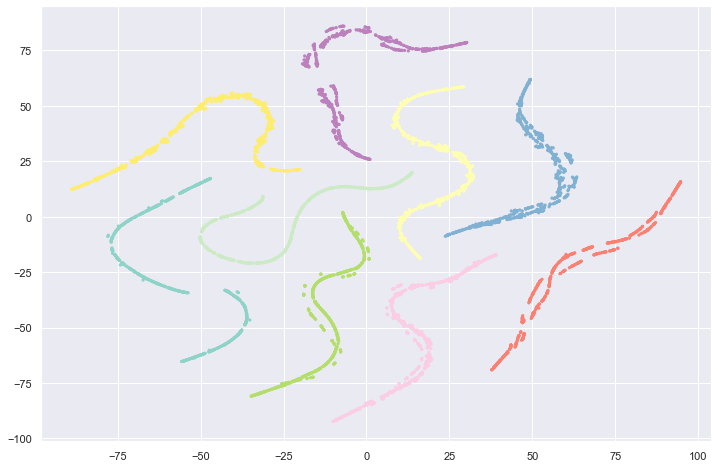

In [25]:
data_x, data_y = data_x_y[:, 0], data_x_y[:, 1]

plt.scatter(data_x, data_y, c=cluster_labels, cmap="Set3", s=5)
plt.show()


# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**